In [6]:
import os
import csv
import numpy as np
home_folder = os.path.expanduser("~")
print(home_folder)

/home/mcy


In [8]:
data_folder = os.path.join(home_folder,"Data")
data_filename = os.path.join(data_folder,"ionosphere.data")

X = np.zeros((351,34), dtype = 'float')
y = np.zeros((351,), dtype = 'bool')

with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i,row in enumerate(reader):
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        y[i] = row[-1]=="g"
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator, X, y, scoring = 'accuracy')
print(scores)

[ 0.82051282  0.78632479  0.86324786]


In [9]:
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.3%


In [10]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

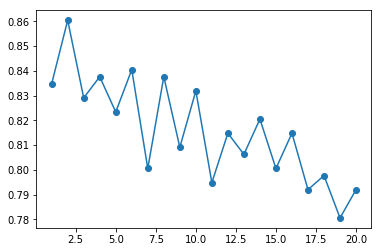

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(parameter_values,avg_scores, '-o')

In [13]:
print(X.shape)

(351, 34)
